In [1]:
import pandas as pd
import os

path = r'D:\elice_python\GAS_5\pytest_machine'

In [2]:
os.chdir(path)

In [7]:
data = pd.read_csv('cancer.csv', header=0)

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,18.0,10.4,123.0,1000.0,0.1180,0.2780,0.3000,0.1470,0.242,0.0787,...,17.3,185.0,2020.0,0.162,0.666,0.712,0.265,0.460,0.1190,0.0
1,20.6,17.8,133.0,1330.0,0.0847,0.0786,0.0869,0.0702,0.181,0.0567,...,23.4,159.0,1960.0,0.124,0.187,0.242,0.186,0.275,0.0890,0.0
2,19.7,21.3,130.0,1200.0,0.1100,0.1600,0.1970,0.1280,0.207,0.0600,...,25.5,153.0,1710.0,0.144,0.424,0.450,0.243,0.361,0.0876,0.0
3,11.4,20.4,77.6,386.0,0.1420,0.2840,0.2410,0.1050,0.260,0.0974,...,26.5,98.9,568.0,0.210,0.866,0.687,0.258,0.664,0.1730,0.0
4,20.3,14.3,135.0,1300.0,0.1000,0.1330,0.1980,0.1040,0.181,0.0588,...,16.7,152.0,1580.0,0.137,0.205,0.400,0.163,0.236,0.0768,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
print(data.shape, X.shape, y.shape)

(569, 31) (569, 30) (569,)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [13]:
X_scaled = scaler.transform(X)
print(X_scaled)

[[0.5217803  0.02331869 0.54545455 ... 0.91065292 0.59763314 0.42105263]
 [0.64488636 0.27340318 0.61432507 ... 0.63917526 0.23274162 0.22368421]
 [0.60227273 0.39168638 0.59366391 ... 0.83505155 0.40236686 0.21447368]
 ...
 [0.45549242 0.62149375 0.44214876 ... 0.48797251 0.12820513 0.15263158]
 [0.64488636 0.66204799 0.66253444 ... 0.91065292 0.49704142 0.45394737]
 [0.03693182 0.49983102 0.02823691 ... 0.         0.25641026 0.10131579]]


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [16]:
print(X_scaled.shape)
print(X_pca.shape)
print(X_pca)

(569, 30)
(569, 2)
[[ 1.38760941  0.42597544]
 [ 0.46387493 -0.55813435]
 [ 0.95553433 -0.11019595]
 ...
 [ 0.22608153 -0.28761085]
 [ 1.67854973  0.3367554 ]
 [-0.90522652 -0.10455549]]


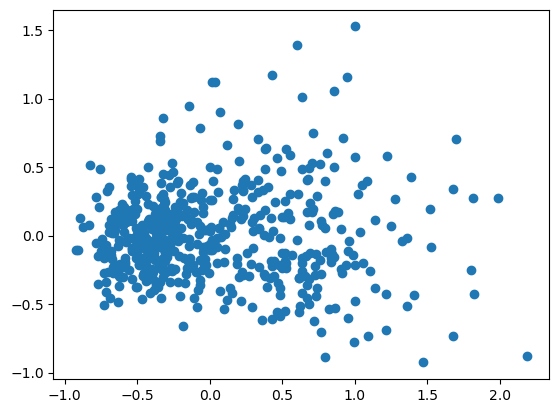

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

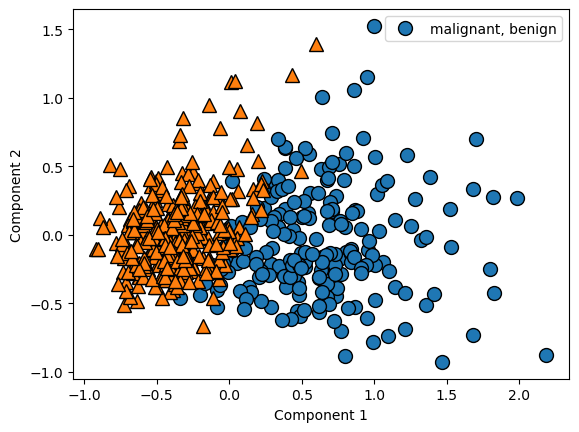

In [19]:
import mglearn
import matplotlib.pyplot as plt

mglearn.discrete_scatter(x1=X_pca[:,0],x2=X_pca[:,1],y=y)
plt.legend(['malignant, benign'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [20]:
pca.explained_variance_ratio_

array([0.53091562, 0.17297393])

In [21]:
pca.components_

array([[ 2.42661970e-01,  9.65037468e-02,  2.51767203e-01,
         2.16642886e-01,  1.10108740e-01,  2.40725343e-01,
         3.01649471e-01,  3.22614446e-01,  1.11429380e-01,
         4.33405050e-02,  1.21947701e-01, -1.04915837e-05,
         1.18446470e-01,  1.03597261e-01, -4.64337473e-03,
         1.29697832e-01,  6.56783132e-02,  1.24698663e-01,
         1.45363028e-02,  4.55707499e-02,  2.59718131e-01,
         1.13831362e-01,  2.60944032e-01,  2.06055472e-01,
         1.23208178e-01,  2.04506601e-01,  2.44350673e-01,
         3.70856053e-01,  9.59743887e-02,  9.48480158e-02],
       [-2.61108511e-01, -5.92564494e-02, -2.37799709e-01,
        -2.31055909e-01,  2.00465257e-01,  2.13977635e-01,
         1.13683955e-01, -8.42367246e-03,  2.11247739e-01,
         4.06796712e-01, -6.68428941e-02,  6.00475909e-02,
        -5.12348293e-02, -8.28854012e-02,  1.35730499e-01,
         2.22975847e-01,  1.02793747e-01,  1.05640603e-01,
         1.40401357e-01,  1.72116071e-01, -2.44338977e-

In [24]:
import numpy as np
np.argmax(pca.components_[0]), max(pca.components_[0])

(27, 0.37085605282965467)